#OpenCV Surgery 103

Welcome back to Surgery 103

lets get started with the last set of the first OpenCV Surgery, what I will cover in this notebook 

* Cropping
* Image Arithmetic
* Splitting & Merging Channels


Each of these techniques will be thoroughly covered. So let's get started and commence our exploration.


##Python getting started

Firstly, to get access to images we need to Mount the Google Drive to Google Colab.


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Importing the necessary Python packages

# We begin by installing the "pyheif" library using the pip package manager. This library enables us to work with HEIC image files.
!pip install pyheif

import pyheif  # Importing the pyheif library to handle HEIC files and convert them to more widely supported formats
import numpy as np  # Importing numpy for efficient numerical operations and array manipulation
from google.colab.patches import cv2_imshow  # Importing cv2_imshow from google.colab.patches to display images in Google Colab
from PIL import Image  # Importing PIL.Image for image processing capabilities
import cv2  # Importing cv2 from OpenCV for computer vision tasks
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot for creating visualizations
import imutils  # Importing imutils for image resizing, rotating, and cropping
import os  # Importing os for interacting with the operating system, such as file handling and directory manipulation

# These imported packages will be essential for our image processing and computer vision tasks.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 54.8 MB/s eta 0:00:00





The function bellow will convert a HEIC image into PNG format. This function takes two arguments the **heic_path**, which is the path to the input HEIC image, and the **png_path**, the path where the output will be saved as a PNG image.



In [3]:
def convert_heic_to_png(heic_path, png_path):
    """
    Converts a HEIC image to PNG format and saves the output to a specified path.

    Args:
        heic_path (str): Path to the input HEIC image.
        png_path (str): Path to save the output PNG image.

    Returns:
        None.
    """
    heic_image = pyheif.read(heic_path)  # Read the input HEIC image
    rgb_image = Image.frombytes(  # Convert the HEIC image to RGB format
        heic_image.mode,
        heic_image.size,
        heic_image.data,
        "raw",
        heic_image.mode,
        heic_image.stride,
    )
    rgb_image.save(png_path, "PNG")  # Save the RGB image to PNG format at the specified path


To convert the two images conveniently, the **convert_heic_images** function  designed to convert multiple HEIC photos. The first arguments are **heic_paths**, a list of paths to the input HEIC images, and **output_dir**, the dir where the converted PNG images will be saved.

In [4]:

def convert_heic_images(heic_paths, output_dir):
    # Check if the output directory exists and create it if it doesn't
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Iterate over the HEIC image paths and convert each image to PNG format
    for path in heic_paths:
        filename = os.path.basename(path).split(".")[0] + ".png"
        output_path = os.path.join(output_dir, filename)
        convert_heic_to_png(path, output_path)


In [5]:
# Convert the HEIC images to PNG format and save to a new location in the /content directory
heic_paths = ["/content/drive/MyDrive/IMG_1655.HEIC", "/content/drive/MyDrive/IMG_1650.HEIC"]
output_dir = "/content/png_images"
convert_heic_images(heic_paths, output_dir)


##Loading Image with OpenCV






In [6]:
# Load the two converted images
bike = cv2.imread('/content/png_images/IMG_1650.png')
coogee_beach = cv2.imread('/content/png_images/IMG_1655.png')

#Crop Image with OpenCV

Cropping an image involves selecting a specific Region Of Interest (ROI) and extracting it from the original image. With powerful cv2 module, OpenCV provides seamless support for this task. Since images in OpenCV are represented as NumPy arrays, we can use array slicing to extract the desired ROI based on coordinates or dimensions.

To get started, we can examine the image format by printing the ratio of the resized bike image. This information can be used in photo editing software to precisely define the cropping region.

OpenCV offers efficient image cropping using NumPy array slicing. The process involves specifying the desired row and column ranges as follows.
```
image[startY:endY, startX:endX]
```

We can effortlessly crop the image by assigning appropriate values to startY, endY, startX, and endX. Slicing along the startY:endY range selects specific rows while slicing along the startX:endX range extracts the desired columns within the image. This flexibility allows us to accurately extract the ROI for further analysis or processing.

Using OpenCV, you can run the provided code to observe the complete image-cropping process. Feel free to modify the cropping coordinates or dimensions to meet your requirements.




(-0.5, 299.5, 224.5, -0.5)

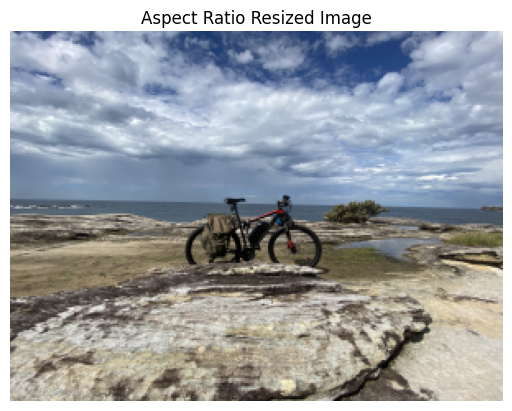

In [22]:
# Resizig the bike image ASPECT RATIO:
r = 300.0 / bike.shape[1]                                   # Initializing AR. 
dim = (300, int(bike.shape[0] * r))                         # Initialization. 
ratio_resized_bike = cv2.resize(bike, dim,interpolation=cv2.INTER_AREA)                # Resizing Image. 
plt.imshow(cv2.cvtColor(ratio_resized_bike,cv2.COLOR_BGR2RGB))# plot Image. 
plt.title("Aspect Ratio Resized Image") 
plt.axis('off')   

In [24]:
# print the bike format
print(f"Examine the dimensions of the Ratio Resized Image\nwidth: {ratio_resized_bike.shape[1]} pixels\nheight: {ratio_resized_bike.shape[0]} pixels\nchannels: {ratio_resized_bike.shape[2]}")

Examine the dimensions of the Ratio Resized Image
width: 300 pixels
height: 225 pixels
channels: 3


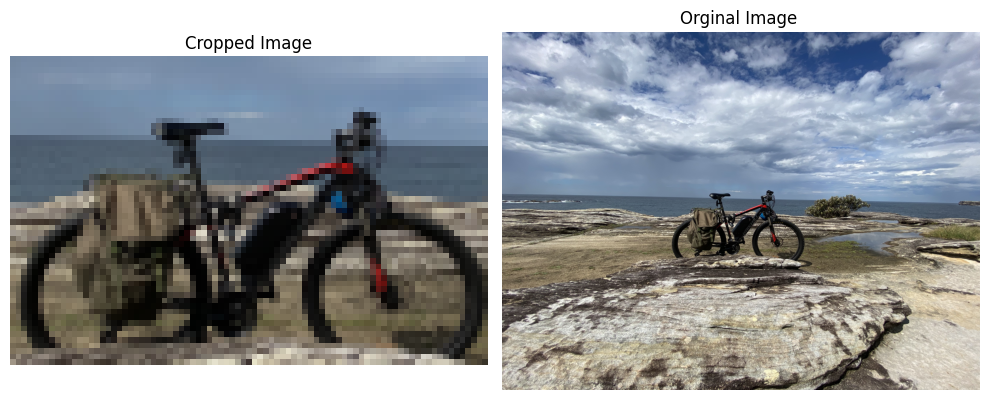

In [25]:
#determine the ROI 
crop=ratio_resized_bike[90:145,105:190]

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the cropped image
axs[0].imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
axs[0].set_title("Cropped Image")
axs[0].axis("off")


# Plot the aspect ratio resized image
axs[1].imshow(cv2.cvtColor(bike, cv2.COLOR_BGR2RGB))
axs[1].set_title("Orginal Image ")
axs[1].axis("off")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


#Image Arithmetic with OpenCV

Image Arithmetic is a fundamental concept in image processing that involves performing mathematical operations on pixel values to achieve desired modifications or transformations. OpenCV provides several functions for Image Arithmetic, including cv2.add(), cv2.subtract(), cv2.divide(), and cv2.multiply().

(-0.5, 4031.5, 3023.5, -0.5)

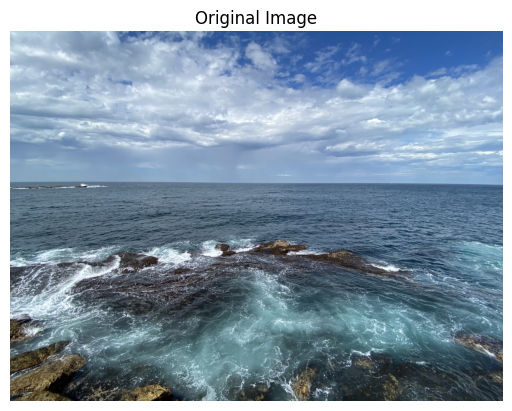

In [26]:
# Plotting the original image
plt.imshow(cv2.cvtColor(coogee_beach, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

**cv2.add()** function adds pixel values between two images of the same size or between an image and a constant weight. The function performs element-wise addition, which computes the sum of corresponding pixels from the input images or between an image and a constant weight. The result is an output image with the combined pixel values. This operation is useful for various tasks such as adjusting brightness, creating overlays, or blending images. 

(-0.5, 4031.5, 3023.5, -0.5)

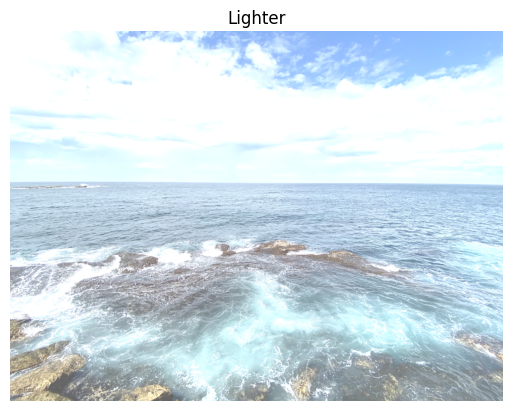

In [27]:
# Adding a constant value to the image
M = np.ones(coogee_beach.shape, dtype="uint8") * 100
added = cv2.add(coogee_beach, M)
plt.imshow(cv2.cvtColor(added, cv2.COLOR_BGR2RGB))
plt.title("Lighter")
plt.axis('off')

Similarly, the **cv2.subtract()** It subtracts pixel values between two images of the same size or between an image and a constant value. The function performs element-wise subtraction, which means it computes the difference between corresponding pixels from the input images or between an image and a constant value. The result is an output image with the subtracted pixel values. This operation is commonly employed for creating image masks, removing backgrounds, or highlighting image differences.

(-0.5, 4031.5, 3023.5, -0.5)

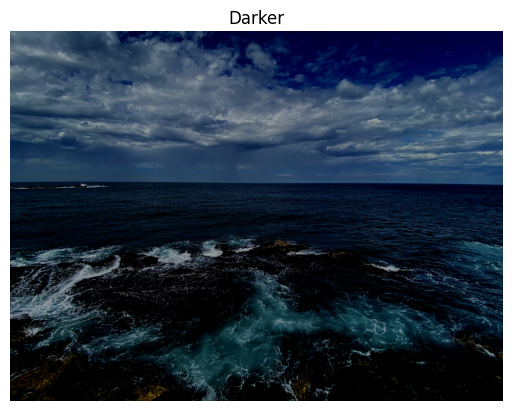

In [28]:
# Subtracting a constant value from the image
M = np.ones(coogee_beach.shape, dtype="uint8") * 100
subtracted = cv2.subtract(coogee_beach, M)
plt.imshow(cv2.cvtColor(subtracted, cv2.COLOR_BGR2RGB))
plt.title("Darker")
plt.axis('off')

**cv2.divide()** function performs pixel-wise division between two images or between an image and a scalar value. It calculates the quotient of corresponding pixels and generates an output image with the divided pixel values. This operation is commonly used for various purposes, such as normalization, attenuating pixel intensities, or implementing specific image filters. By dividing the pixel values, you can effectively adjust the intensity levels of an image or apply certain filters that rely on division operations.

(-0.5, 4031.5, 3023.5, -0.5)

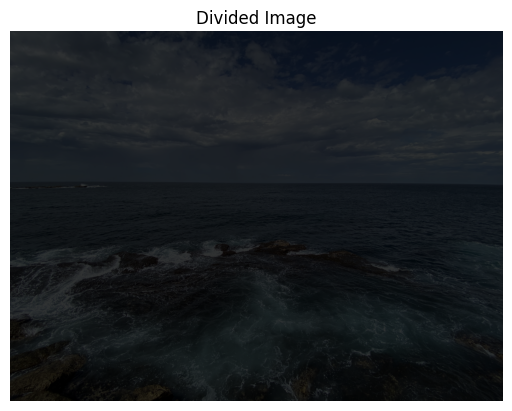

In [29]:
# Divide the image by a constant value
M = np.ones(coogee_beach.shape, dtype="uint8") * 5
divided = cv2.divide(coogee_beach, M)
plt.imshow(cv2.cvtColor(divided, cv2.COLOR_BGR2RGB))
plt.title("Divided Image")
plt.axis('off')

lastly, the **cv2.multiply()** function allows for pixel-wise multiplication between two images or between an image and a constant value. It computes the element-wise product of corresponding pixels and generates an output image with the multiplied pixel values. This operation is commonly used for various purposes, such as intensity scaling, contrast adjustments, or applying specific image effects. By multiplying the pixel values, you can effectively enhance or modify the intensity levels of an image, adjust the contrast, or achieve desired visual results.

(-0.5, 4031.5, 3023.5, -0.5)

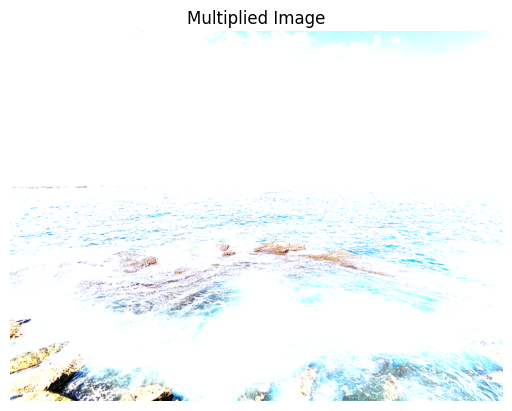

In [30]:
# Multiply the image by a constant value
M = np.ones(coogee_beach.shape, dtype="uint8") * 5
multiplied = cv2.multiply(coogee_beach, M)
plt.imshow(cv2.cvtColor(multiplied, cv2.COLOR_BGR2RGB))
plt.title("Multiplied Image")
plt.axis('off')

The choice of which operation to use depends on the desired effect and the specific requirements of the image-processing task. By adjusting the input images, constants, or scalar values, you can control the magnitude of the impact and achieve the desired result. It is essential to ensure the compatibility of the image data types for accurate and meaningful results.

In summary, Image Arithmetic operations in OpenCV provide a powerful toolbox for manipulating image pixel values. By utilizing cv2.add(), cv2.subtract(), cv2.divide(), and cv2.multiply(), various modifications such as brightness adjustments, contrast enhancements, normalization, or intensity scaling can be efficiently achieved. The appropriate operation is chosen based on the desired effect and the specific requirements of the image-processing task.

# Splitting & Merging Channels with OpenCV


Splitting and merging channels is a technique in image processing that allows us to manipulate individual colour channels of an image. OpenCV provides efficient functions, namely cv.split() and cv.merge(), for performing these operations.

When we split an image using cv.split(), it separates the image into its constituent colour channels, typically red, green, and blue (RGB). This results in three separate grayscale images, each representing the intensity of a specific colour channel. These individual channels can be processed independently to achieve desired effects. For instance, we can enhance the contrast of the red channel, adjust the brightness of the green channel, or apply a specific filter to the blue channel. By splitting the channels, we gain precise control over the colour information within the image.

On the other hand, when we merge channels using cv.merge(), we combine multiple grayscale images representing different colour channels into a single multichannel image. By specifying the order of the channels, we can reconstruct the original colour image. This merging operation is crucial after performing independent operations on individual colour channels. It allows us to combine the modified channels and generate the final output image.



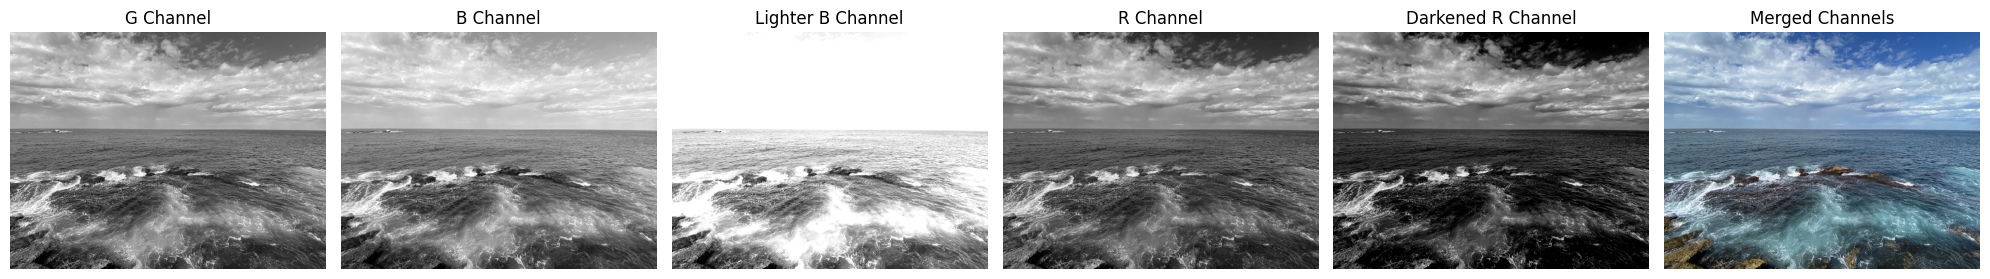

In [31]:
# Split the image channels
B, G, R = cv2.split(coogee_beach)

# Make adjustments to the channels
darkened_R = cv2.subtract(R, 50)  # Darken the red channel by subtracting 50 from its pixel values
lighter_B = cv2.add(B, 100)  # Lighten the blue channel by adding 100 to its pixel values

# Merge the channels back into an image
merged_image = cv2.merge([B, G, R])

# Set the figure size and create subplots
fig, axs = plt.subplots(1, 6, figsize=(20, 5))

# Display the individual channels
axs[0].imshow(G, cmap='gray')
axs[0].set_title("G Channel")
axs[0].axis('off')

axs[1].imshow(B, cmap='gray')
axs[1].set_title("B Channel")
axs[1].axis('off')

axs[2].imshow(lighter_B, cmap='gray')
axs[2].set_title("Lighter B Channel")
axs[2].axis('off')

axs[3].imshow(R, cmap='gray')
axs[3].set_title("R Channel")
axs[3].axis('off')

axs[4].imshow(darkened_R, cmap='gray')
axs[4].set_title("Darkened R Channel")
axs[4].axis('off')

# Display the merged image
axs[5].imshow(imutils.opencv2matplotlib(merged_image))
axs[5].set_title("Merged Channels")
axs[5].axis('off')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()



By utilizing the cv.split() and cv.merge() functions in OpenCV, we can effectively manipulate the colour channels of an image for various purposes, including colour correction, channel-based image analysis, and creating special effects. Understanding how to split and merge channels provides a powerful toolset to work with colour information and achieve precise control over image processing.

#Summary 

This concluding series of OpenCV Surgery delves into essential techniques ranging from image loading to channel splitting and merging. It serves as a comprehensive guide to mastering the basics of OpenCV.


#Refrunses 

* https://github.com/PyImageSearch/imutils/tree/master
* https://pyimagesearch.com/practical-python-opencv/